### Evaluating a models preformance 
In practice the typical workflow you will go through when building a model is:
```
Build a model: fit it -> evaluate it -> tweak it -> repeat...
```

- When building model we want to experiment with the best fit
- When evaluating models you want to visualize

Its a good idea to viualize:

- The Data: what data are you working with?
- The Model: What does the model look like?
- The Training: how does the model perform while learning?
- The Predictions: how do the perdictions line up against the original labels?

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [3]:
# Create a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [4]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

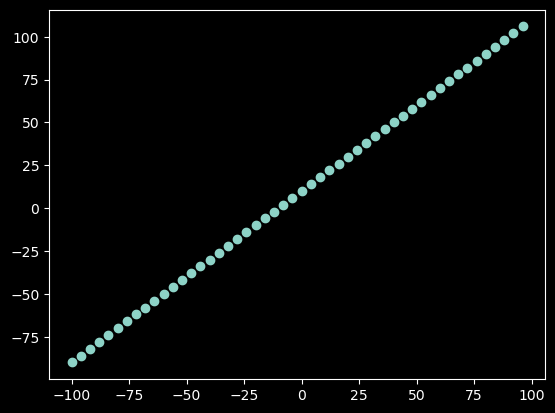

In [5]:
plt.scatter(X, y)

### The 3 Sets

* **Training Set**: the model that learns from the data, which is typically 70%-80% of the data available

* **Validation set**: the model gets tuned on this data, which is typically 10%-15% of the data available

* **Test set**: the model gets evaluated on this data to test what it has learned, this set is typically 10%-15% of the total data available

In [6]:
# Check the amount of sample we have
len(X)

50

In [7]:
# Split the Data into train and test sets
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

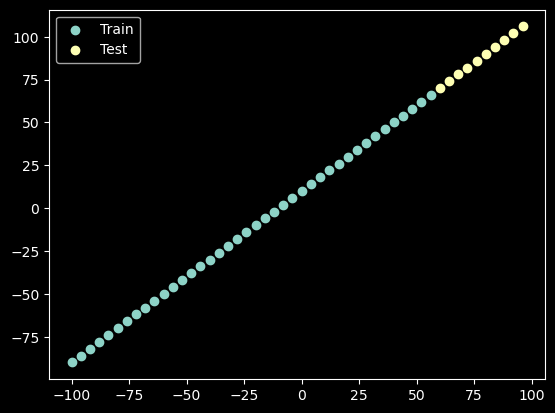

In [8]:
# Visualize the split data
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.legend(["Train", "Test"])

### Vizualizing the model

In [14]:
# Create a model which builds automatically by defining the input_shape
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

#Compile the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params**: total number of parameters in the model
* **Trainable params**: the parameters the model can update as it trains
* **Non-trainable params**: aren't updated during training. This is typical when bringing in already learned parameters from other models during ***transfer learning***

In [16]:
# fit the model
model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0
)

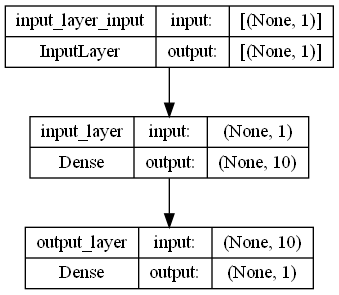

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)